In [2]:
#  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score, recall_score, f1_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#  Load the dataset
Obesity = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
Obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
Obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [5]:
display(Obesity.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [6]:
Obesity.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## 3. Visualization

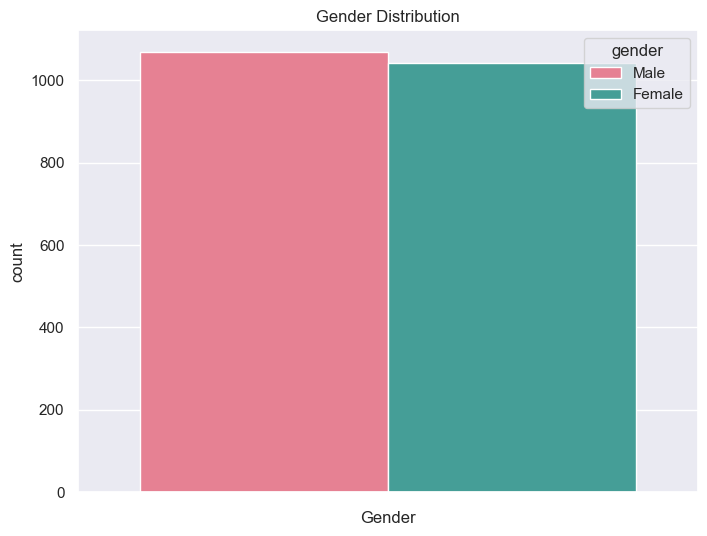

In [7]:
# barplt of genders 
sns.set_theme(rc={"figure.figsize": (8, 6)}) 
gender = Obesity['Gender'].value_counts().reset_index()
gender.columns = ['gender', 'count']

palette = sns.color_palette("husl", n_colors=gender.shape[0])  # or use your own list
sns.barplot(data=gender, hue='gender', y='count', palette=palette)
plt.xlabel('Gender')
plt.ylabel('count')
plt.title('Gender Distribution')
plt.show()

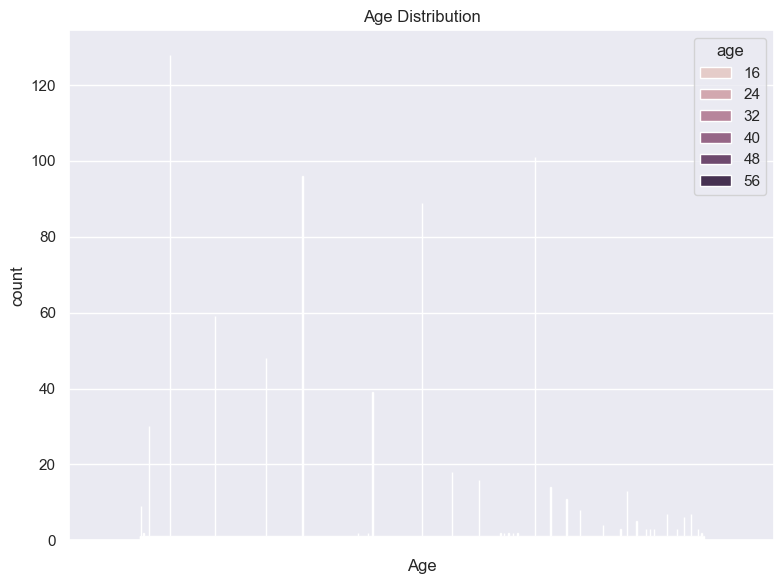

In [63]:
# barplt of Race 

sns.set_theme(rc={"figure.figsize": (8, 6)}) 

age = Obesity['Age'].value_counts().reset_index()
age.columns = ['age', 'count']
sns.set_palette('bright')
sns.barplot(data=age, hue='age', y='count')


plt.xlabel('Age')
plt.ylabel('count')
plt.title('Age Distribution')
#plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Age_Distribution.png', bbox_inches='tight', dpi=200)
plt.show()

/var/folders/q0/33zn28r13yg22lf2t7vpv50c0000gn/T/ipykernel_4578/803465068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


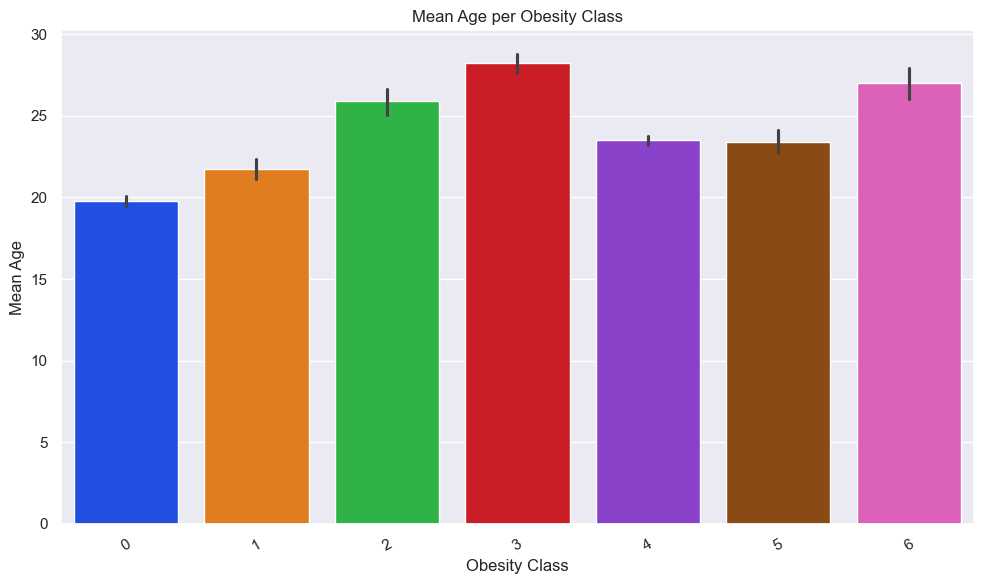

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(
    x="NObeyesdad",          # Obesity class
    y="Age",                 # Age to aggregate
    data=Obesity,
    estimator='mean',        # Aggregation function, e.g., mean (can use np.median or others)
    palette="bright"         # Vivid color palette
)
plt.title("Mean Age per Obesity Class")
plt.xlabel("Obesity Class")
plt.ylabel("Mean Age")
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('Mean_Age_per_Obesity_Clas.png', bbox_inches='tight', dpi=200)
plt.show()

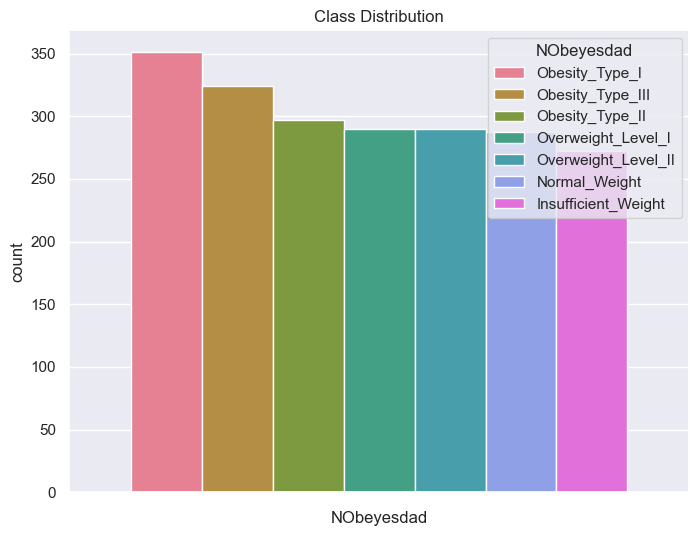

In [10]:
# barplt of genders 
sns.set_theme(rc={"figure.figsize": (8, 6)}) 
gender = Obesity['NObeyesdad'].value_counts().reset_index()
gender.columns = ['NObeyesdad', 'count']

palette = sns.color_palette("husl", n_colors=gender.shape[0])  # or use your own list
sns.barplot(data=gender, hue='NObeyesdad', y='count', palette=palette)
plt.xlabel('NObeyesdad')
plt.ylabel('count')
plt.title('Class Distribution')
plt.show()

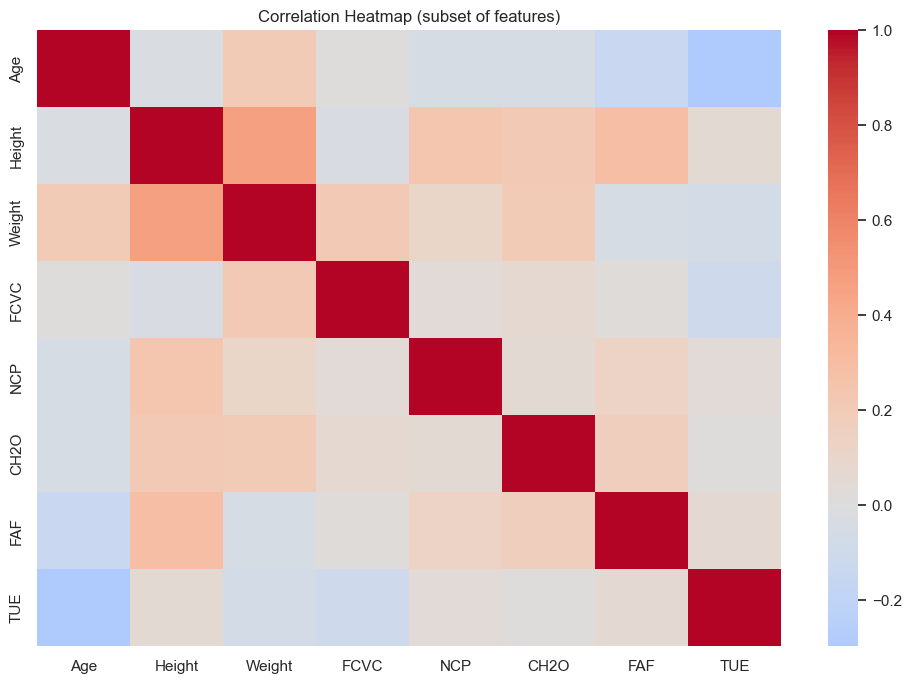

In [11]:
# Correlation heatmap (first 15 features for readability)
corr = Obesity.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (subset of features)")
plt.show()

In [12]:
# Encode categorical features
# Label encoding for any categorical variables
label_encoders = {}
for column in Obesity.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    Obesity[column] = le.fit_transform(Obesity[column])
    label_encoders[column] = le

In [13]:
Obesity

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [14]:
# Separate features and the target variable
X = Obesity.drop("NObeyesdad", axis=1)   # Features
y = Obesity["NObeyesdad"]                # Target column (obesity level)


In [15]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [22]:
# Build the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,       # number of trees
    max_depth=None,         # expand fully
    random_state=42
)
#  Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [23]:
# Make predictions
rf_pred = rf_model.predict(X_test)
rf_accuracy_score=accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted')
rf_recall    = recall_score(y_test, rf_pred, average='weighted')
rf_f1        = f1_score(y_test, rf_pred, average='weighted')


In [24]:
#  Evaluate model performance
print("Accuracy:", rf_accuracy_score)
print("Precision:", rf_precision)
print("recall:", rf_recall)
print("f1 score:", rf_f1)

Accuracy: 0.9574468085106383
Precision: 0.9605897489176132
recall: 0.9574468085106383
f1 score: 0.9580244534544385


In [25]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

In [26]:
dt_accuracy_score=accuracy_score(y_test, dt_preds)
dt_precision = precision_score(y_test, dt_preds, average='weighted')
dt_recall    = recall_score(y_test, dt_preds, average='weighted')
dt_f1        = f1_score(y_test, dt_preds, average='weighted')
# Evaluate model performance
print("Accuracy:", dt_accuracy_score)
print("Precision:", dt_precision)
print("recall:", dt_recall)
print("f1 score:", dt_f1)

Accuracy: 0.91725768321513
Precision: 0.920614523345879
recall: 0.91725768321513
f1 score: 0.9182457402801354


In [37]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

In [38]:
knn_accuracy_score=accuracy_score(y_test, knn_preds)
knn_precision = precision_score(y_test, knn_preds, average='weighted')
knn_recall    = recall_score(y_test, knn_preds, average='weighted')
knn_f1        = f1_score(y_test, knn_preds, average='weighted')
# Evaluate model performance
print("Accuracy:", knn_accuracy_score)
print("Precision:", knn_precision)
print("recall:", knn_recall)
print("f1 score:", knn_f1)

Accuracy: 0.8794326241134752
Precision: 0.8823434485569852
recall: 0.8794326241134752
f1 score: 0.8767407927227742


In [39]:
# XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

/opt/homebrew/anaconda3/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [21:18:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [33]:
xgb_accuracy_score=accuracy_score(y_test, xgb_preds)
xgb_precision = precision_score(y_test, xgb_preds, average='weighted')
xgb_recall    = recall_score(y_test, xgb_preds, average='weighted')
xgb_f1        = f1_score(y_test, xgb_preds, average='weighted')
# Evaluate model performance
print("Accuracy:", xgb_accuracy_score)
print("Precision:", xgb_precision)
print("recall:", xgb_recall)
print("f1 score:", xgb_f1)

Accuracy: 0.9574468085106383
Precision: 0.9594818209537683
recall: 0.9574468085106383
f1 score: 0.9578503952619949


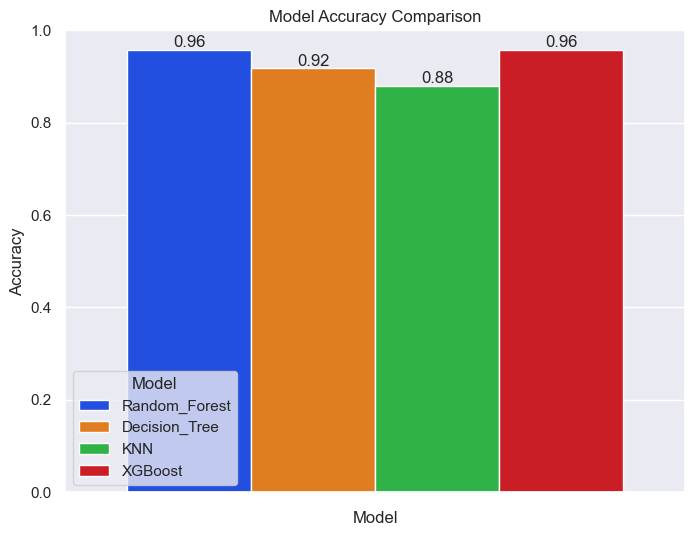

In [58]:
# visualize the Accuracy results 
models = ['Random_Forest', 'Decision_Tree', 'KNN', 'XGBoost' ]
scores = [rf_accuracy_score, dt_accuracy_score,knn_accuracy_score ,xgb_accuracy_score]
df = pd.DataFrame({'Model': models, 'Accuracy': scores})
ax= sns.barplot(data=df, hue='Model', y='Accuracy')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1) 
plt.savefig('model_accuracy_comparison.png', bbox_inches='tight', dpi=200)  # saves as PNG with tight bounding box
plt.show()

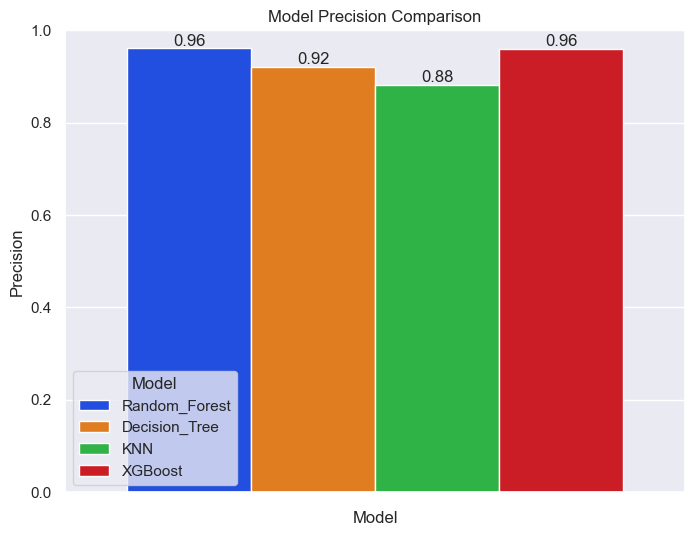

In [59]:
models = ['Random_Forest', 'Decision_Tree', 'KNN', 'XGBoost' ]
scores = [rf_precision, dt_precision,knn_precision ,xgb_precision]
precision = pd.DataFrame({'Model': models, 'precision': scores})
ax= sns.barplot(data=precision, hue='Model', y='precision')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.ylabel('Precision')
plt.xlabel('Model')
plt.title('Model Precision Comparison')
plt.ylim(0, 1) 
plt.savefig('model_Precision_comparison.png', bbox_inches='tight', dpi=200)  # saves as PNG with tight bounding box

plt.show()

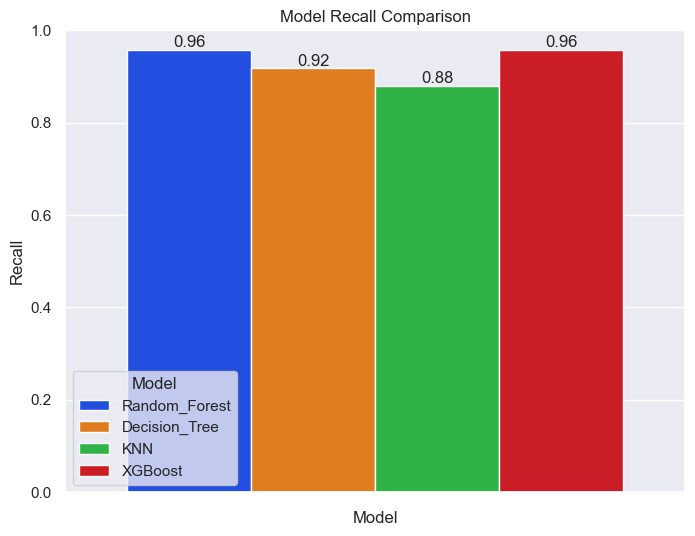

In [60]:
models = ['Random_Forest', 'Decision_Tree', 'KNN', 'XGBoost' ]
scores = [rf_recall, dt_recall,knn_recall ,xgb_recall]
recall = pd.DataFrame({'Model': models, 'recall': scores})
ax= sns.barplot(data=recall, hue='Model', y='recall')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.ylabel('Recall')
plt.xlabel('Model')
plt.title('Model Recall Comparison')
plt.ylim(0, 1) 
plt.savefig('model_Recall_comparison.png', bbox_inches='tight', dpi=200)  # saves as PNG with tight bounding box

plt.show()

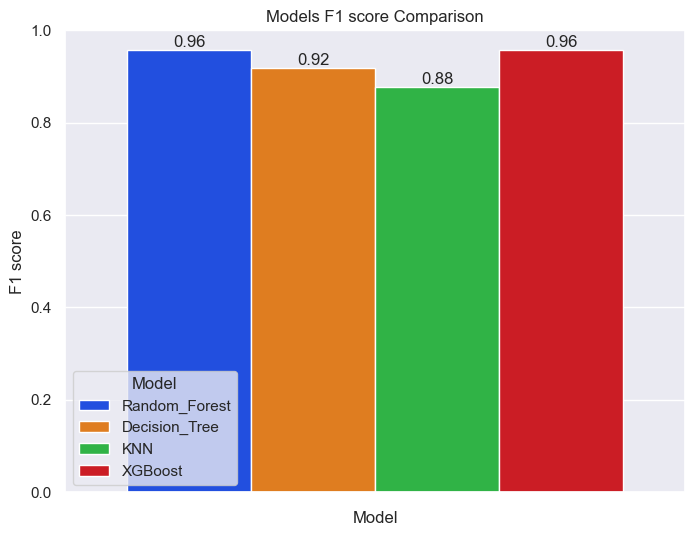

In [61]:
models = ['Random_Forest', 'Decision_Tree', 'KNN', 'XGBoost' ]
scores = [rf_f1, dt_f1,knn_f1 ,xgb_f1]
f1 = pd.DataFrame({'Model': models, 'F1': scores})
ax= sns.barplot(data=f1, hue='Model', y='F1')
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

plt.ylabel('F1 score')
plt.xlabel('Model')
plt.title('Models F1 score Comparison')
plt.ylim(0, 1) 
plt.savefig('model_F1Score_comparison.png', bbox_inches='tight', dpi=200)  # saves as PNG with tight bounding box

plt.show()